In [1]:
import os 
from datetime import timedelta

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

DATA_DIR = '/pool001/jschless/kiran-data/kiran-data/'
TURKEY_DIR = '/pool001/jschless/turkish_astroturfing'

In [2]:
# Loading df created in the Turkey_Data_Wrangling notebook
df = pd.read_pickle(os.path.join(DATA_DIR, 'mega_df.pkl'))

In [29]:
df.head()

,created_at,id,text,author,author_id,trend,exposed,date,trend_date,tweet_type,tr_start,tr_end,vol,max_rank,lifetime,attack,time_since_trending,lexicon,follower_data
0,2020-05-02 14:05:16,1256585550796148738,#MilliGazeteOkuyorum #SesimizBir #Cumartesi #D...,GunesliGuzel,293656352,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,434672,False,True
1,2020-05-02 14:05:16,1256585550796148738,#MilliGazeteOkuyorum #SesimizBir #Cumartesi #D...,GunesliGuzel,293656352,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 18:22:52,2019-07-05 19:42:43,-1,4,0 days 01:19:51.000000000,True,434622,False,True
2,2020-05-02 14:05:16,1256585550796148738,#MilliGazeteOkuyorum #SesimizBir #Cumartesi #D...,GunesliGuzel,293656352,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 19:52:41,2019-07-05 20:57:40,-1,5,0 days 01:04:59.000000000,True,434532,False,True
3,2019-11-18 17:38:31,1196482833696645120,Kamuda çalışan üniversiteli işçiler memur stat...,yaprakergen,325766266,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,195845,False,False
4,2019-11-18 17:38:31,1196482833696645120,Kamuda çalışan üniversiteli işçiler memur stat...,yaprakergen,325766266,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 18:22:52,2019-07-05 19:42:43,-1,4,0 days 01:19:51.000000000,True,195795,False,False


In [32]:
df.drop_duplicates(subset=['id'])

,created_at,id,text,author,author_id,trend,exposed,date,trend_date,tweet_type,tr_start,tr_end,vol,max_rank,lifetime,attack,time_since_trending,lexicon,follower_data
0,2020-05-02 14:05:16,1256585550796148738,#MilliGazeteOkuyorum #SesimizBir #Cumartesi #D...,GunesliGuzel,293656352,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,434672,False,True
3,2019-11-18 17:38:31,1196482833696645120,Kamuda çalışan üniversiteli işçiler memur stat...,yaprakergen,325766266,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,195845,False,False
6,2019-11-11 17:02:57,1193937167007068160,@MemurSenKonf Üniversite mezunu 4D'li işçiler ...,Erdemakkusss,965200054352076800,#ÜniversiteliİşçilereAdalet,True,NaT,NaT,NaN,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,185730,False,True
9,2019-11-11 15:21:30,1193911634013630466,@_aliyalcin_ Üniversite mezunu 4D'li işçiler o...,Erdemakkusss,965200054352076800,#ÜniversiteliİşçilereAdalet,True,NaT,NaT,NaN,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,185628,False,True
12,2019-11-11 15:21:17,1193911580230062080,@SabahMemurlar Üniversite mezunu 4D'li işçiler...,Erdemakkusss,965200054352076800,#ÜniversiteliİşçilereAdalet,True,NaT,NaT,NaN,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,185628,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988506,2019-06-18 19:15:58,1141062013822603264,RT @Adem48944009: Artik son bulsun #HamzaHocaK...,missing,1015624019935145984,#HamzaHocaKomisyonuBitr,False,2019-06-18,2019-06-18,retweet,2019-06-18 18:13:27,2019-06-18 19:19:50,-1,1,0 days 01:06:23.000000000,True,62,False,False
7988508,2019-06-18 19:16:15,1141062085142560768,bakanlığın önünden dahi geçmek istemiyorum. ev...,missing,1131253925271748609,#HamzaHocaKomisyonuBitr,False,2019-06-18,2019-06-18,tweet,2019-06-18 18:13:27,2019-06-18 19:19:50,-1,1,0 days 01:06:23.000000000,True,62,False,False
7988510,2019-06-18 19:18:26,1141062634596442113,RT @NazmiGiray: Türkiyeyi ortadoğu ülkesi yapm...,missing,1013348011,#HamzaHocaKomisyonuBitr,False,2019-06-18,2019-06-18,retweet,2019-06-18 18:13:27,2019-06-18 19:19:50,-1,1,0 days 01:06:23.000000000,True,64,False,False
7988512,2019-06-18 19:24:59,1141064282957856771,RT @001_gzm: #HamzaHocaKomisyonuBitr neden ayn...,dnenada79967117,1133434241591779331,#HamzaHocaKomisyonuBitr,True,2019-06-18,2019-06-18,retweet,2019-06-18 18:13:27,2019-06-18 19:19:50,-1,1,0 days 01:06:23.000000000,True,71,False,True


In [28]:
df.describe()

,id,author_id,vol,max_rank,time_since_trending
count,7.988522e+06,7.988522e+06,7.988522e+06,7.988522e+06,7.988522e+06
mean,1.090706e+18,4.817476e+17,2.984038e+04,2.231116e+00,-2.191435e+05
std,1.970642e+17,5.096005e+17,6.683093e+04,1.694464e+00,7.821418e+05
min,1.000000e+09,-1.000000e+00,-1.000000e+00,1.000000e+00,-5.596476e+06
25%,9.946794e+17,8.823814e+08,-1.000000e+00,1.000000e+00,-5.939800e+05
50%,1.141345e+18,4.346265e+09,-1.000000e+00,1.000000e+00,-2.917000e+03
75%,1.186887e+18,9.880697e+17,2.476800e+04,3.000000e+00,1.646460e+05
max,1.409289e+18,1.408753e+18,4.140690e+05,1.000000e+01,1.063515e+06


In [3]:
# get all users that posted a lexicon tweet
astrobots = set(df.query('lexicon == True').author_id.unique())

In [4]:
len(df.trend.unique())

418

In [5]:
df.head()

,created_at,id,text,author,author_id,trend,exposed,date,trend_date,tweet_type,tr_start,tr_end,vol,max_rank,lifetime,attack,time_since_trending,lexicon,follower_data
0,2020-05-02 14:05:16,1256585550796148738,#MilliGazeteOkuyorum #SesimizBir #Cumartesi #D...,GunesliGuzel,293656352,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,434672,False,True
1,2020-05-02 14:05:16,1256585550796148738,#MilliGazeteOkuyorum #SesimizBir #Cumartesi #D...,GunesliGuzel,293656352,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 18:22:52,2019-07-05 19:42:43,-1,4,0 days 01:19:51.000000000,True,434622,False,True
2,2020-05-02 14:05:16,1256585550796148738,#MilliGazeteOkuyorum #SesimizBir #Cumartesi #D...,GunesliGuzel,293656352,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 19:52:41,2019-07-05 20:57:40,-1,5,0 days 01:04:59.000000000,True,434532,False,True
3,2019-11-18 17:38:31,1196482833696645120,Kamuda çalışan üniversiteli işçiler memur stat...,yaprakergen,325766266,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,195845,False,False
4,2019-11-18 17:38:31,1196482833696645120,Kamuda çalışan üniversiteli işçiler memur stat...,yaprakergen,325766266,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,NaN,2019-07-05 18:22:52,2019-07-05 19:42:43,-1,4,0 days 01:19:51.000000000,True,195795,False,False


## Transforming Raw Data into A Panel of Time Series

In [6]:
def build_df(df, trend,
             include_missing=False, 
             drop_astrobots=True,
             time_bin='5Min', 
             minutes_to_round=5):
    # takes the dataframe and a hashtag and converts it to a event study dataframe for that hashtag

    df = df[df.trend == trend].set_index('created_at')
        
    if not include_missing: 
        # Remove tweets from users lacking follower info
        # df = df.query('author_id != -1 and author != "missing"')
        df = df[df.follower_data == True]

    if drop_astrobots:
        # Remove tweets from users that posted lexicon tweets
        df = df[~df.author_id.isin(astrobots)]

    start, end = df.iloc[0].tr_start, df.iloc[0].tr_end
    start = start - timedelta(minutes=start.minute % minutes_to_round,
                              seconds=start.second,
                              microseconds=start.microsecond)

    df['tweet_type'] = df.text.apply(lambda x: 'retweet' if x.startswith('RT') else 'tweet')
    
    # Binning various statistics of interest
    series_list = []
    
    
    types = ['tweet', 'retweet']    
    # bin tweets and retweets separately
    for t in types:
        series_list.append(
            df[df.tweet_type == t]
              .resample(time_bin)
              .count()
              .author_id
        )
        
    # add in the tweets from unexposed users
    series_list.append(
        df.query('tweet_type == "tweet" and exposed == False')
          .resample(time_bin)
          .count()
          .author_id
    )
        
    new_df = pd.DataFrame(series_list).T
    new_df.columns = [*types, 'zero_exposure_tweets']
    
    # normalize time to minutes before / after trend
    new_df['absolute_time'] = new_df.index
    new_df.index = new_df.index - start
    new_df.index = new_df.index.map(lambda x: int(x.total_seconds() / 60))

    # add additional info to dataset
    new_df['trend'] = trend
    new_df['time'] = new_df.index
    new_df['time_i'] = range(len(new_df))
    new_df['trending_start'] = start

    return new_df

### Selecting Specific Hashtags
There are a lot of hashtags, so it might be worthwhile to remove the hashtags at either extreme. 

In [77]:
sizes.describe()

count    4.180000e+02
mean     1.911130e+04
std      1.446005e+05
min      1.300000e+01
25%      4.197500e+02
50%      1.142000e+03
75%      3.649750e+03
max      2.398920e+06
dtype: float64

In [13]:
sizes = df.groupby('trend').size()
lower, upper = .5, 1 # thresholds for which quantiles to include
l, u = sizes.quantile([lower, upper])

# only select trends between the lower and upper thresholds
trends = sizes.where(sizes <= u).where(sizes >= l).dropna().index 

## Building Panel
For each selected trend, build the panel

In [ ]:
dfs = []
for trend in tqdm(trends):
    temp_df = build_df(df, trend, time_bin='5Min', minutes_to_round=5)

    if not temp_df is None:
        # assign dummy variable for whether a hashtag is trending or not
        temp_df = temp_df.assign(threshold=(temp_df.time > 0).astype(int))
        dfs.append(temp_df)
panel_df = pd.concat(dfs)

 37%|███▋      | 156/418 [13:19<20:03,  4.59s/it]  

In [4]:
# load full panel from memory
panel_df = pd.read_pickle(os.path.join(DATA_DIR, 'full_panel_df.pkl'))

In [11]:
def plot_event_study(df, cat: str='zero_exposure_tweets', quantiles=(.025,.975),
                    lower=-120, upper=120, title=None):
    # useful for plotting panel data
    if title is None:
        title = cat
    df = df.loc[(df.index>lower)&(df.index<upper)]
    median = df.groupby('time')[cat].median()
    mean = df.groupby('time')[cat].mean()
    p025 = df.groupby('time')[cat].quantile(quantiles[0])
    p975 = df.groupby('time')[cat].quantile(quantiles[1])
    plt.errorbar(mean.index, mean, xerr=.5, yerr=[mean-p025, p975-mean],
                 fmt='o', capsize=10, label='mean')
    plt.scatter(median.index, median, c='r', label='median')
    print(df.describe())
    plt.title('Event Study of ' + title)
    plt.xlabel('Time Since Trending')
    plt.ylabel('Count')
    plt.legend()

              tweet      retweet  zero_exposure_tweets          time  \
count  12914.000000  4378.000000          12653.000000  12930.000000   
mean       8.725879     0.828689              2.049000     26.793890   
std       19.718926     1.803046              4.600561     61.575793   
min        0.000000     0.000000              0.000000   -115.000000   
25%        0.000000     0.000000              0.000000    -10.000000   
50%        2.000000     0.000000              0.000000     35.000000   
75%        8.000000     1.000000              2.000000     75.000000   
max      224.000000    19.000000             70.000000    115.000000   

              time_i     threshold  
count   12930.000000  12930.000000  
mean   115518.506883      0.698376  
std    229096.518728      0.458981  
min         0.000000      0.000000  
25%        12.000000      0.000000  
50%        27.000000      1.000000  
75%     94653.750000      1.000000  
max    976653.000000      1.000000  


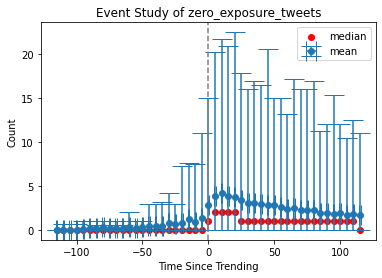

In [12]:
plot_event_study(panel_df)
plt.axvline(c='grey', ls='--')

              tweet      retweet  zero_exposure_tweets          time  \
count  19194.000000  6701.000000           7373.000000  19210.000000   
mean       7.498750     0.709148              0.252950     41.295679   
std       18.512523     1.690365              0.921737     92.335515   
min        0.000000     0.000000              0.000000   -175.000000   
25%        0.000000     0.000000              0.000000    -10.000000   
50%        1.000000     0.000000              0.000000     55.000000   
75%        6.000000     1.000000              0.000000    115.000000   
max      224.000000    19.000000             23.000000    175.000000   

              time_i     threshold  
count   19210.000000  19210.000000  
mean   117398.499271      0.712389  
std    230531.115101      0.452660  
min         0.000000      0.000000  
25%        17.000000      0.000000  
50%        37.000000      1.000000  
75%    104480.750000      1.000000  
max    976665.000000      1.000000  


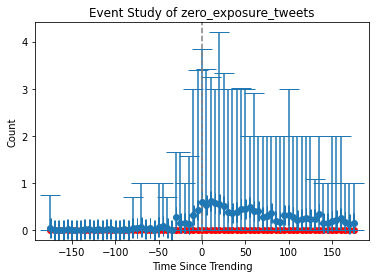

In [85]:
plot_event_study(panel_df, lower=-180, upper=180)
plt.axvline(c='grey', ls='--')

In [14]:
top_half = panel_df[panel_df.trend.isin(trends)]

              tweet      retweet  zero_exposure_tweets          time  \
count  10900.000000  5548.000000          10748.000000  10912.000000   
mean      11.676881     0.748198              2.416450     33.676228   
std       23.338240     1.754092              5.099421     95.387388   
min        0.000000     0.000000              0.000000   -175.000000   
25%        0.000000     0.000000              0.000000    -30.000000   
50%        3.000000     0.000000              0.000000     45.000000   
75%       12.000000     1.000000              3.000000    110.000000   
max      224.000000    19.000000             70.000000    175.000000   

              time_i     threshold  
count   10912.000000  10912.000000  
mean   173428.723974      0.668805  
std    275701.585206      0.470665  
min         0.000000      0.000000  
25%        22.000000      0.000000  
50%       618.000000      1.000000  
75%    258683.250000      1.000000  
max    976665.000000      1.000000  


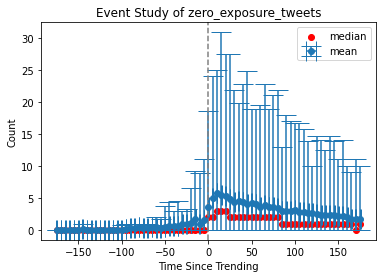

In [15]:
plot_event_study(top_half, lower=-180, upper=180)
plt.axvline(c='grey', ls='--')

(array([393.,  14.,   1.,   1.,   0.,   2.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.30000000e+01, 2.40020700e+04, 4.79911400e+04, 7.19802100e+04,
        9.59692800e+04, 1.19958350e+05, 1.43947420e+05, 1.67936490e+05,
        1.91925560e+05, 2.15914630e+05, 2.39903700e+05, 2.63892770e+05,
        2.87881840e+05, 3.11870910e+05, 3.35859980e+05, 3.59849050e+05,
        3.83838120e+05, 4.0782

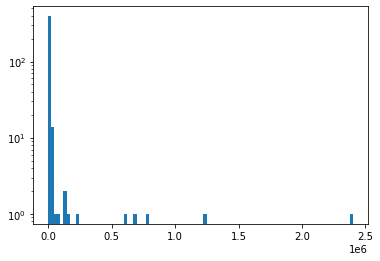

In [90]:
plt.hist(sizes, bins=100, log=True)

## Statistical Analysis

In [7]:
from statsmodels.formula.api import poisson
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.formula.api import negativebinomial

query = panel_df.query('time >= -60 & time <= 60').fillna(0)
query.trend = pd.Categorical(query.trend).codes
query = query.dropna()

formula_string = "tweet ~ time*threshold"

query['ln_tweet'] = np.log(query.tweet + 1)

ols = smf.ols(formula_string, data=query).fit(
    cov_type='cluster', cov_kwds={'groups': query['trend']})


re = smf.mixedlm(formula_string, data=query, groups=query['trend']).fit()
re_ln = smf.mixedlm('ln_' + formula_string, data=query, groups=query['trend']).fit()

formula_string += "+ C(trend)"
pois = poisson(formula_string, data=query).fit()
negbin = negativebinomial(formula_string, data=query).fit()

         Current function value: 3.253252
         Iterations: 35


/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 2.341436
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41


/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [8]:
from statsmodels.iolib.summary2 import summary_col
summary_col([re_ln, pois, negbin], 
           model_names=['Random Effects (logged outcome)', 'Poisson', 'Negative Binomial'],
           regressor_order=['time', 'threshold', 'time:threshold', 'Intercept'],
            drop_omitted=True)

,Random Effects (logged outcome),Poisson,Negative Binomial
time,0.0167,0.0337,0.0406
,(0.0007),(0.0006),(0.0014)
threshold,0.8490,0.5994,0.8270
,(0.0325),(0.0153),(0.0437)
time:threshold,-0.0223,-0.0385,-0.0467
,(0.0009),(0.0007),(0.0016)
Intercept,1.0927,3.1583,3.0242
,(0.0585),(0.0471),(0.1917)


In [64]:
np.exp(.6)

1.8221188003905089

## Who is tweeting before the hashtag trends?

In [98]:
len(df.drop_duplicates(subset=['id']).query('exposed == False and follower_data == True'))

19830

In [99]:
before_trend = (df.drop_duplicates(subset=['id'])
                .query('exposed == False and follower_data == True')
                .query('time_since_trending < -5 and time_since_trending > -30')
               )
before_trend

,created_at,id,text,author,author_id,trend,exposed,date,trend_date,tweet_type,tr_start,tr_end,vol,max_rank,lifetime,attack,time_since_trending,lexicon,follower_data
10994,2019-07-05 16:29:28,1147180704171810816,Kamuya 8bin bekçiyi rahatça alırken\n\nMühendi...,bseyldrkk,417426960,#ReisMühendisMimarAta,False,NaT,NaT,NaN,2019-07-05 16:37:48,2019-07-05 18:07:49,-1,3,0 days 01:30:01.000000000,True,-8,False,True
10996,2019-07-05 16:29:16,1147180654922260480,İnşaat mühendislerine 12 ayda sadece 47 kadro ...,bseyldrkk,417426960,#ReisMühendisMimarAta,False,NaT,NaT,NaN,2019-07-05 16:37:48,2019-07-05 18:07:49,-1,3,0 days 01:30:01.000000000,True,-8,False,True
10998,2019-07-05 16:29:04,1147180605727236096,Mülakatsız atama istiyoruz #ReisMühendisMimarA...,bseyldrkk,417426960,#ReisMühendisMimarAta,False,NaT,NaT,NaN,2019-07-05 16:37:48,2019-07-05 18:07:49,-1,3,0 days 01:30:01.000000000,True,-8,False,True
11005,2019-07-05 16:28:37,1147180493538037761,Özel sektörde iş yok devlette yok. \nBiz ne ya...,bseyldrkk,417426960,#ReisMühendisMimarAta,False,NaT,NaT,NaN,2019-07-05 16:37:48,2019-07-05 18:07:49,-1,3,0 days 01:30:01.000000000,True,-9,False,True
11154,2019-07-05 16:10:59,1147176053418471424,Maliye'den DSİ inşaat mühendisi kadrolarina ON...,bseyldrkk,417426960,#ReisMühendisMimarAta,False,NaT,NaT,NaN,2019-07-05 16:37:48,2019-07-05 18:07:49,-1,3,0 days 01:30:01.000000000,True,-26,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906923,2019-06-20 14:23:50,1141713272900661248,@YolTV Yayında konuşanın olayla alakası olmadı...,hasanbulbul33,842080450919165952,#SiverekteKumpasVar,False,NaT,NaT,NaN,2019-06-20 14:48:21,2019-06-20 17:53:26,11307,1,0 days 03:05:05.000000000,True,-24,False,True
7906925,2019-06-20 14:22:46,1141713003953475584,@YolTV Yazılanları silerek engelleyebilirsiniz...,hasanbulbul33,842080450919165952,#SiverekteKumpasVar,False,NaT,NaT,NaN,2019-06-20 14:48:21,2019-06-20 17:53:26,11307,1,0 days 03:05:05.000000000,True,-25,False,True
7907147,2019-06-20 14:28:53,1141714542667468801,RT @ferhtyavuz: #SiverekteKumpasVar kumpasa ge...,hasanbulbul33,842080450919165952,#SiverekteKumpasVar,False,2019-06-20,2019-06-20,retweet,2019-06-20 14:48:21,2019-06-20 17:53:26,11307,1,0 days 03:05:05.000000000,True,-19,False,True
7939376,2019-06-20 18:25:18,1141774037254905856,#ZiyaHocaKomisynaİmzaAt \nŞun kendimizi tamame...,123Ezher,1131543673668341762,#ZiyaHocaKomisynaİmzaAt,False,NaT,NaT,NaN,2019-06-20 18:33:33,2019-06-20 20:04:21,-1,3,0 days 01:30:48.000000000,True,-8,False,True


In [101]:
query.zero_exposure_tweets.sum()

962.0

In [3]:
df['tweet_type'] = df.text.apply(lambda x: 'retweet' if x.startswith('RT') else 'tweet')
trimming_df = df
print('df starting size', len(trimming_df))
trimming_df = trimming_df.drop_duplicates(subset=['id'])
print('df after removing duplicated tweet ids', len(trimming_df))

trimming_df = trimming_df.query('tweet_type == "tweet"')
print('df after removing retweets', len(trimming_df))

trimming_df = trimming_df.query('follower_data == True')
print('df after removing tweets from users without following data', len(trimming_df))

astrobots = set(df.query('lexicon == True').author_id.unique())
trimming_df = trimming_df[~trimming_df.author_id.isin(astrobots)]
print('df after removing astrobot tweets', len(trimming_df))

trimming_df = trimming_df.query('exposed == False')
print('df after removing exposed tweets', len(trimming_df))

# trimming_df = trimming_df.query('time_since_trending <= 60 and time_since_trending >= -60')
# print('df after removing tweets from outside the hour before and after', len(trimming_df))


df starting size 7988522
df after removing duplicated tweet ids 3051252
df after removing retweets 2997521
df after removing tweets from users without following data 1525341
df after removing astrobot tweets 1184212
df after removing exposed tweets 90875


In [111]:
trimming_df.describe()

,id,author_id,vol,max_rank,time_since_trending
count,1.461000e+04,1.461000e+04,14610.000000,14610.000000,1.461000e+04
mean,1.075116e+18,6.130679e+17,11180.313621,1.449624,-2.727689e+05
std,1.890861e+17,4.968351e+17,37362.347783,0.917182,7.559540e+05
min,1.082295e+10,9.135112e+06,-1.000000,1.000000,-4.883148e+06
25%,9.841624e+17,2.675648e+09,-1.000000,1.000000,-6.241628e+05
50%,1.130085e+18,8.229652e+17,-1.000000,1.000000,-5.765200e+04
75%,1.149419e+18,1.049335e+18,-1.000000,1.000000,1.563500e+03
max,1.408818e+18,1.376274e+18,414069.000000,7.000000,1.060808e+06


In [108]:
trimming_df

,created_at,id,text,author,author_id,trend,exposed,date,trend_date,tweet_type,tr_start,tr_end,vol,max_rank,lifetime,attack,time_since_trending,lexicon,follower_data
0,2020-05-02 14:05:16,1256585550796148738,#MilliGazeteOkuyorum #SesimizBir #Cumartesi #D...,GunesliGuzel,293656352,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,tweet,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,434672,False,True
84,2019-10-29 23:51:31,1189328944518049798,#AtatürkünSevdiğiYemekler En çokta zeytinyağlı...,alialemdaroglu_,872503566090547201,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,tweet,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,167418,False,True
114,2019-10-28 18:27:40,1188885055361425408,#ÜniversiteliİşçilereAdalet tayin hakkınız olm...,Keremde93551456,1159443820033052673,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,tweet,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,165654,False,True
117,2019-10-28 18:25:13,1188884438702264322,#ÜniversiteliİşçilereAdalet bir kamu çalışanın...,Keremde93551456,1159443820033052673,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,tweet,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,165652,False,True
120,2019-10-28 18:20:43,1188883306093404161,#ÜniversiteliİşçilereAdalet Üniversite mezunu ...,Keremde93551456,1159443820033052673,#ÜniversiteliİşçilereAdalet,False,NaT,NaT,tweet,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,True,165647,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985965,2019-06-15 16:10:55,1139928280151158784,Check Out City of Girls https://t.co/OypMxLpdG...,AryanTramp,874934545,#celtabetterouletteturnuvasi,False,NaT,NaT,tweet,2019-06-27 15:20:09,2019-06-27 16:34:48,-1,5,0 days 01:14:39.000000000,True,-17229,False,True
7985966,2019-06-15 16:03:31,1139926419528491008,Check Out Where the crawdads sing https://t.co...,AryanTramp,874934545,#celtabetterouletteturnuvasi,False,NaT,NaT,tweet,2019-06-27 15:20:09,2019-06-27 16:34:48,-1,5,0 days 01:14:39.000000000,True,-17236,False,True
7985974,2019-06-15 14:41:52,1139905870014238720,Download any of your favorite music &amp; vide...,Aziz_NumbOne,477416472,#celtabetterouletteturnuvasi,False,NaT,NaT,tweet,2019-06-27 15:20:09,2019-06-27 16:34:48,-1,5,0 days 01:14:39.000000000,True,-17318,False,True
7986467,2019-07-10 16:54:56,1148999052861804544,#Tesladandogumgünühediyesi https://t.co/tZer70...,sosyoparti,1143901319591280640,#Tesladandogumgünühediyesi,False,NaT,NaT,tweet,2019-07-10 15:32:00,2019-07-10 17:36:58,-1,5,0 days 02:04:58.000000000,True,82,False,True


# Maybe the Trend Dates are Parsed Incorrectly?

In [112]:
TURKEY_DIR = '/pool001/jschless/turkish_astroturfing'

trend_file = 'trend_analysis_top10.csv' 
#trend_file = 'world_trend_analysis_top10.csv'

trending_info = pd.read_csv(os.path.join(TURKEY_DIR, trend_file),
                           parse_dates=['tr_start', 'tr_end', 'lifetime', 'date'])

trending_info['trend'] = trending_info.keyword

trending_info = trending_info.drop(columns=['date', 'id', 'keyword'])


trending_info.head()

,tr_start,tr_end,vol,max_rank,lifetime,attack,trend
0,2019-06-27 06:14:01,2019-06-27 08:09:03,-1,8,0 days 01:55:02.000000000,False,"""Maçka"""
1,2019-06-20 18:38:28,2019-06-20 22:24:33,14474,1,0 days 03:46:05.000000000,True,#1200ÜcretliAtamasıHaktır
2,2019-06-20 22:29:29,2019-06-20 23:59:37,14495,6,0 days 01:30:08.000000000,False,#1200ücretliatamasıhaktır
3,2019-07-15 04:12:22,2019-07-15 13:02:52,118537,1,0 days 08:50:30.000000000,False,#15TEMMUZDESTANI
4,2019-07-15 13:32:57,2019-07-15 13:47:54,124473,1,0 days 00:14:57.000000000,False,#15TEMMUZDESTANI


In [114]:
trending_info2 = pd.read_csv(os.path.join(TURKEY_DIR, trend_file))
trending_info2.query('keyword == "#ÜniversiteliİşçilereAdalet"')

,id,tr_start,tr_end,vol,max_rank,lifetime,keyword,date,attack
1405,#ÜniversiteliİşçilereAdalet_2019-07-05_17:32:49,2019-07-05 17:32:49,2019-07-05 18:12:53,-1,1,0 days 00:40:04.000000000,#ÜniversiteliİşçilereAdalet,2019-07-05,True
1406,#ÜniversiteliİşçilereAdalet_2019-07-05_18:22:52,2019-07-05 18:22:52,2019-07-05 19:42:43,-1,4,0 days 01:19:51.000000000,#ÜniversiteliİşçilereAdalet,2019-07-05,True
1407,#ÜniversiteliİşçilereAdalet_2019-07-05_19:52:41,2019-07-05 19:52:41,2019-07-05 20:57:40,-1,5,0 days 01:04:59.000000000,#ÜniversiteliİşçilereAdalet,2019-07-05,True
